In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('D:/datasets/datascience_jobdata.csv')

In [3]:
data.sample(4)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
5579,5003,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,500-999,Pvt Ltd,9.0,0.0
8718,7307,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,5000-9999,Pvt Ltd,51.0,0.0
8531,13033,city_16,0.910,Male,Has relevent experience,no_enrollment,Masters,STEM,14.0,10/49,Funded Startup,77.0,0.0
16252,5211,city_90,0.698,NaN,No relevent experience,Full time course,Masters,STEM,0.0,50-99,NGO,29.0,0.0


In [4]:
data.shape

(19158, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [6]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [7]:
#calculating the percentage of a data that the column has missing.
data.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
col = [var for var in data.columns if data[var].isnull().mean()<0.05 and data[var].isnull().mean()>0]
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
column_lessthan_five = data[col]
column_lessthan_five.head(1)

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.92,no_enrollment,Graduate,20.0,36.0


In [10]:
data_remaining=data[col].dropna().shape[0]/data.shape[0]
total_missing=column_lessthan_five.isnull().mean().sum()*100

print(data_remaining,total_missing)
print(data.shape,column_lessthan_five.dropna().shape)

0.8968577095730244 11.253784319866375
(19158, 13) (17182, 5)


In [11]:
dropping_missingvalue=column_lessthan_five.dropna()

In [12]:
si_mean = SimpleImputer(strategy='mean')
si_median = SimpleImputer(strategy='median')

experience_mean=si_mean.fit_transform(column_lessthan_five[['experience']])
experience_median=si_median.fit_transform(column_lessthan_five[['experience']])

training_hour_mean = si_mean.fit_transform(column_lessthan_five[['training_hours']])
training_hour_median = si_median.fit_transform(column_lessthan_five[['training_hours']])

In [13]:
print(f'The variance of the original data:{data["training_hours"].var()}')
print(f'The variance after dropping the missing values{dropping_missingvalue["training_hours"].var()}')
print(f'The variance after imputing the mean value: {training_hour_mean.var()}')
print(f'The variance after imputing the median value: {training_hour_median.var()}')

The variance of the original data:3586.2881933989347
The variance after dropping the missing values3576.1342391288217
The variance after imputing the mean value: 3442.7093728364084
The variance after imputing the median value: 3455.404048354614


In [14]:
print(f'The variance of the original data:{data["experience"].var()}')
print(f'The variance after dropping the missing values{dropping_missingvalue["experience"].var()}')
print(f'The variance after imputing the mean value: {experience_mean.var()}')
print(f'The variance after imputing the median value: {experience_median.var()}')

The variance of the original data:42.31851676548554
The variance after dropping the missing values42.240657490952955
The variance after imputing the mean value: 42.17272795107154
The variance after imputing the median value: 42.175640124685096


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000012210F17700>],
      dtype=object)

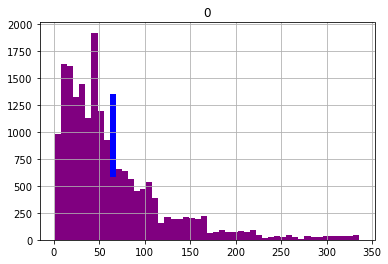

In [93]:
fig=plt.figure()
ax = fig.add_subplot(111)

data['training_hours'].hist(color='red', ax=ax, bins=50,density=True)
dropping_missingvalue['training_hours'].hist(color='green', ax=ax, bins=50, density=True, alpha=0.8)

pd.DataFrame(training_hour_mean).hist(color='blue', ax=ax, bins=50)
pd.DataFrame(training_hour_median).hist(color='purple', ax=ax, bins=50)


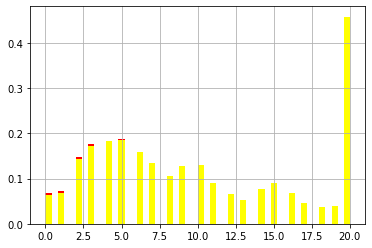

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111)

data['experience'].hist(ax=ax, color='red', density=True, bins=50)
dropping_missingvalue['experience'].hist(ax=ax, color='yellow', bins=50, density=True)



array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000012212924BB0>],
      dtype=object)

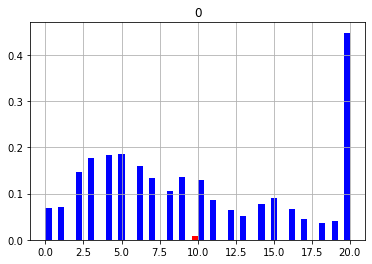

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111)

pd.DataFrame(experience_mean).hist(ax=ax, color='red', bins=50, density=True)
pd.DataFrame(experience_median).hist(ax=ax, color='blue', bins=50, density=True)

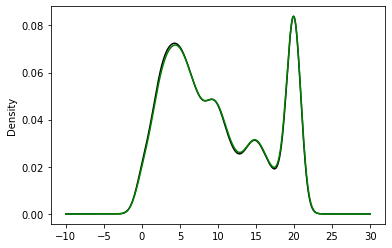

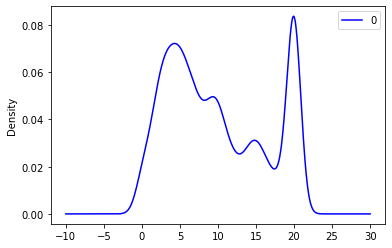

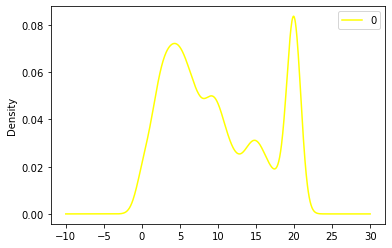

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

data['experience'].plot.density(color='black')
dropping_missingvalue['experience'].plot.density(color='green')

pd.DataFrame(experience_mean).plot.density(color='blue')
pd.DataFrame(experience_median).plot.density(color='yellow')

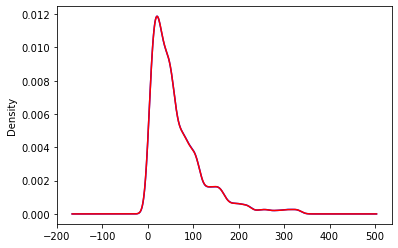

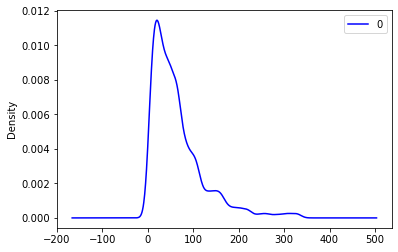

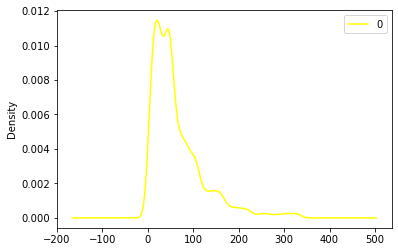

In [19]:
data['training_hours'].plot.density(color='blue')
dropping_missingvalue['training_hours'].plot.density(color='red')

pd.DataFrame(training_hour_mean).plot.density(color='blue')
pd.DataFrame(training_hour_median).plot.density(color='yellow')

# Using titanic dataset

In [38]:
data_second = pd.read_csv('D:/datasets/train.csv')
data_second.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [71]:
data_second.shape

(891, 12)

In [39]:
data_second.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:
missing_in_percentage = data_second.isnull().mean()*100
missing_in_percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [74]:
dropped = data_second.dropna(subset=['Age'])
dropped.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [79]:
age_mean = si_mean.fit_transform(data_second[['Age']])
age_median = si_median.fit_transform(data_second[['Age']])

In [81]:
print(f'The variance of the original data:{data_second["Age"].var()}')
print(f'The variance after dropping the missing values{dropped["Age"].var()}')
print(f'The variance after imputing the mean value: {age_mean.var()}')
print(f'The variance after imputing the median value: {age_median.var()}')

The variance of the original data:211.0191247463081
The variance after dropping the missing values211.0191247463081
The variance after imputing the mean value: 168.86266660394793
The variance after imputing the median value: 169.32224856193815


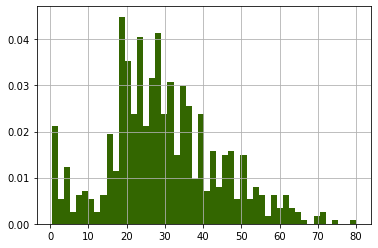

In [86]:
fig=plt.figure()
ax = fig.add_subplot(111)

data_second['Age'].hist(color='red', ax=ax, bins=50,density=True)
dropped['Age'].hist(color='green', ax=ax, bins=50, density=True, alpha=0.8)



array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000122109E5100>],
      dtype=object)

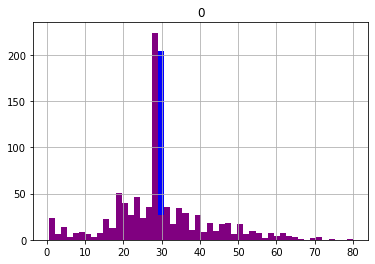

In [87]:
fig=plt.figure()
ax = fig.add_subplot(111)

pd.DataFrame(age_mean).hist(color='blue', ax=ax, bins=50)
pd.DataFrame(age_median).hist(color='purple', ax=ax, bins=50)


In [27]:
dropped.shape

(714, 12)

In [28]:
data_second.shape

(891, 12)

In [29]:
891-177

714

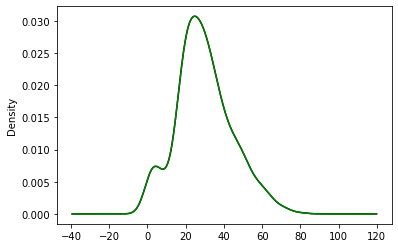

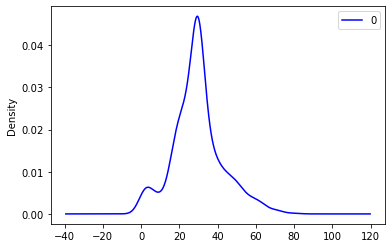

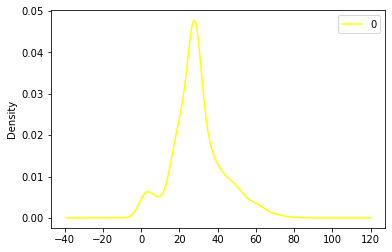

In [95]:
data_second['Age'].plot.density(color='black')
dropped['Age'].plot.density(color='green')

pd.DataFrame(age_mean).plot.density(color='blue')
pd.DataFrame(age_median).plot.density(color='yellow')